# DATA ANALYSIS AND VISUALIZATION FILE
This file is for data analysis and visualization of the data. the data is imported from 'loading_data.ipynb', so make sure the data preprocessing is working correctly within that notebook.

In [1]:
import os
import pandas as pd
import seaborn as sns
from src.loading_functions import load_or_download_lego_data,preprocess_data
import requests
import matplotlib.pyplot as plt

In [2]:
#get cwd
cwd = os.getcwd()
#get data folder
data_folder = os.path.join(cwd, 'data')

In [3]:
#load or download lego data
dfall = load_or_download_lego_data(data_folder) #check if you have dependencies installed. else run first cell
df = preprocess_data(dfall,include_monthly=False)
dft= preprocess_data(dfall,include_monthly=True)

Loading data from c:\Users\MGAJ\OneDrive - Danmarks Tekniske Universitet\DTU\Kandidat\4_Semester\Social Data Visualization\MarcusGalea.github.io\data\lego_sets.csv


c:\Users\MGAJ\OneDrive - Danmarks Tekniske Universitet\DTU\Kandidat\4_Semester\Social Data Visualization\MarcusGalea.github.io\src\loading_functions.py:10: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(data_folder, 'lego_sets.csv'))
c:\Users\MGAJ\OneDrive - Danmarks Tekniske Universitet\DTU\Kandidat\4_Semester\Social Data Visualization\MarcusGalea.github.io\src\loading_functions.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.columns[date_columns]] = df[df.columns[date_columns]].applymap(lambda x: x.split("T")[0])
c:\Users\MGAJ\OneDrive - Danmarks Tekniske Universitet\DTU\Kandidat\4_Semester\Social Data Visualization\MarcusGalea.github.io\src\loading_functions.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.columns[date_columns]] = df[df.columns[date_columns]].applymap(lambda x: x.split("T")[0])


In [4]:
df.columns
num_unique_sets = df['number'].nunique()
print(num_unique_sets)

1993


In [5]:
#Get the interesting columns of the dataset
countries = ["US", "UK", "CA", "DE", "PL"]
conversion_to_euro = {"US": 0.85, "UK": 1.17, "CA": 0.68, "PL": 0.23, "DE": 1}
retail_price_columns = [country + "_retail_price" for country in countries]
#date columns
date_columns = ["date" in column for column in df.columns]
df.columns[date_columns]

Index(['lastUpdated', 'US_dateFirstAvailable', 'US_dateLastAvailable',
       'UK_dateFirstAvailable', 'UK_dateLastAvailable',
       'CA_dateFirstAvailable', 'CA_dateLastAvailable',
       'DE_dateFirstAvailable', 'DE_dateLastAvailable'],
      dtype='object')

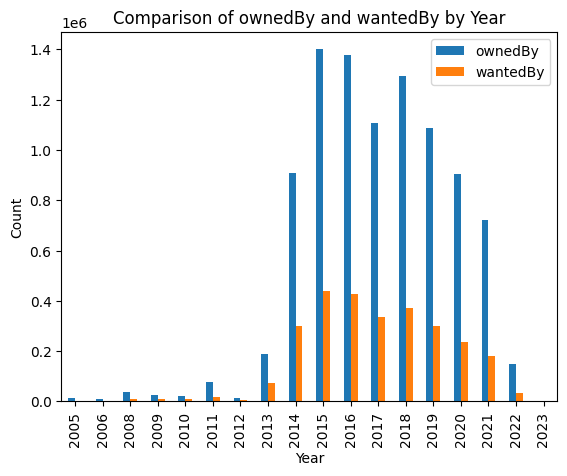

In [6]:
# Group by 'year' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = df.groupby('year')[['ownedBy', 'wantedBy']].sum()

# Plot
grouped_df.plot(kind='bar', stacked=False)
plt.title('Comparison of ownedBy and wantedBy by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

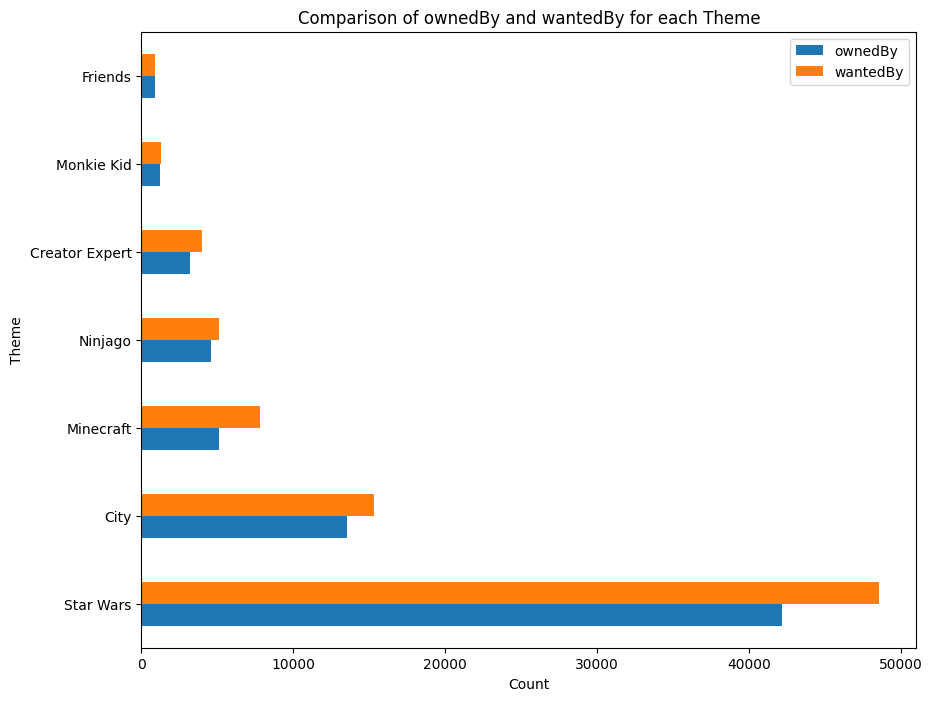

In [7]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('theme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df = grouped_df.sort_values(by=['wantedBy', 'ownedBy'], ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Theme')
ax.set_title('Comparison of ownedBy and wantedBy for each Theme')

# Show the plot
plt.show()

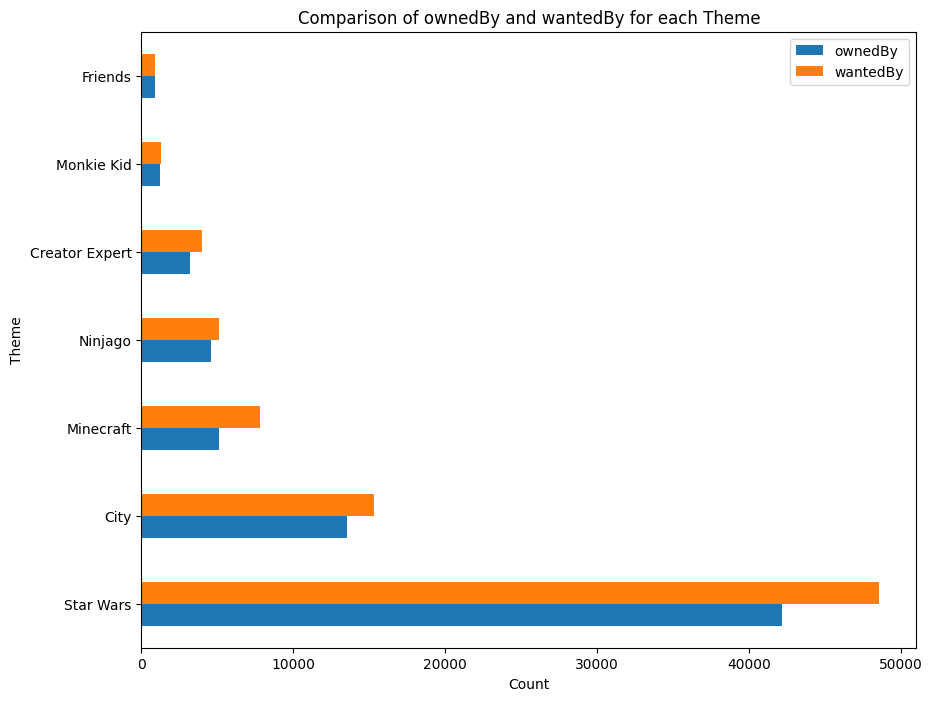

In [8]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('theme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df = grouped_df.sort_values(by=['wantedBy', 'ownedBy'], ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Theme')
ax.set_title('Comparison of ownedBy and wantedBy for each Theme')

# Show the plot
plt.show()

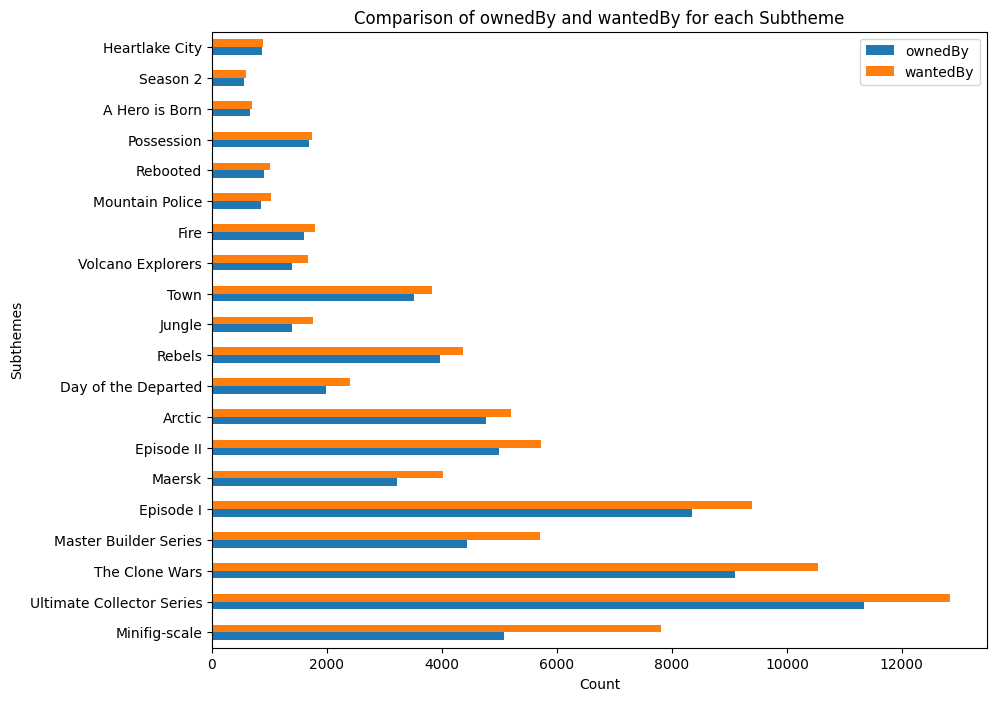

In [9]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Subthemes')
ax.set_title('Comparison of ownedBy and wantedBy for each Subtheme')

# Show the plot
plt.show()

In [10]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral3
from bokeh.transform import dodge

# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['subtheme'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each Subtheme')

# Create horizontal bar charts
p.hbar(y=dodge('subtheme', -0.25, range=p.y_range), right='ownedBy', height=0.4, color=Spectral3[0], source=source, legend_label="ownedBy")
p.hbar(y=dodge('subtheme', 0.25, range=p.y_range), right='wantedBy', height=0.4, color=Spectral3[1], source=source, legend_label="wantedBy")

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [11]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import dodge

# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['subtheme'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each Subtheme')

# Create horizontal bar charts with specified colors
p.hbar(y=dodge('subtheme', -0.25, range=p.y_range), right='ownedBy', height=0.4, color="#add8e6", source=source, legend_label="ownedBy")  # Light blue
p.hbar(y=dodge('subtheme', 0.25, range=p.y_range), right='wantedBy', height=0.4, color="#ffa07a", source=source, legend_label="wantedBy")  # Light salmon

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Add interactivity to the legend
p.legend.click_policy = "hide"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

HEAT MAP - REALISED DATES (HOVER)

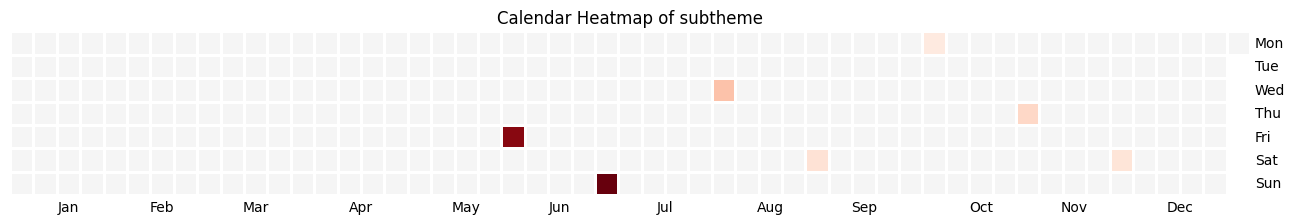

In [12]:

import calmap


# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a pivot table with 'Date' as index and the count of 'Theme' as values
pivot_df = df.pivot_table(index='Date', aggfunc='count')['subtheme']

# Create a calendar heatmap
plt.figure(figsize=(16,10))
calmap.yearplot(data=pivot_df, year=2018)  # Change the year to the year you want to plot
plt.title('Calendar Heatmap of subtheme')
plt.show()

trial interactive

In [13]:
from bokeh.io import show
from bokeh.models import (ColumnDataSource, HoverTool, LinearColorMapper,
                          BasicTicker, PrintfTickFormatter, ColorBar)
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.palettes import Viridis256
import pandas as pd
import numpy as np
from datetime import datetime

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a pivot table with 'Date' as index and the count of 'Theme' as values
pivot_df = df.pivot_table(index='Date', aggfunc='count')['subtheme']

# Create a new DataFrame with 'day', 'month', 'year', and 'count' columns
df_new = pd.DataFrame({
    'day': pivot_df.index.day,
    'month': pivot_df.index.month,
    'year': pivot_df.index.year,
    'count': pivot_df.values
})

# Filter the DataFrame for the year you want to visualize
year = 2022  # Change this to the year you want to visualize
df_year = df_new[df_new['year'] == year]

# Create a ColumnDataSource from df_year
source = ColumnDataSource(df_year)

# Create a color mapper
color_mapper = LinearColorMapper(palette=Viridis256, low=df_year['count'].min(), high=df_year['count'].max())

# Create a new figure
p = figure(title=f"Calendar Heatmap of Theme for {year}", x_range=(1, 12), y_range=(1, 31),
           x_axis_label='Month', y_axis_label='Day', toolbar_location=None,
           tools="hover", tooltips=[("Count", "@count")])

# Create a rectangle for each day of the year
p.rect(x="month", y="day", width=1, height=1, source=source,
       fill_color=transform('count', color_mapper), line_color=None)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

# Show the plot
show(p)

In [14]:
import numpy as np
from bokeh.io import show
from bokeh.models import (ColumnDataSource, HoverTool, LinearColorMapper,
                          BasicTicker, PrintfTickFormatter, ColorBar, Slider)
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.palettes import Viridis256
from bokeh.layouts import column
import panel as pn

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create a pivot table with 'subtheme', 'Year', and 'Month' as index and the count as values
pivot_df = df.pivot_table(index=['subtheme', 'Year', 'Month'], aggfunc='count', fill_value=0)['theme'].reset_index()

# Create a ColumnDataSource from pivot_df
source = ColumnDataSource(pivot_df)

# Create a color mapper
color_mapper = LinearColorMapper(palette=Viridis256)

# Create a new figure
p = figure(title="Calendar Heatmap of Subtheme", x_range=(1, 12), y_range=list(df['subtheme'].unique()),
           x_axis_label='Month', y_axis_label='Subtheme', toolbar_location=None,
           tools="hover", tooltips=[("Count", "@Theme")])

# Create a rectangle for each month of each subtheme
p.rect(x="Month", y="subtheme", width=1, height=1, source=source,
       fill_color=transform('theme', color_mapper), line_color=None)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

# Create a slider to select the year
slider = Slider(start=df['Year'].min(), end=df['Year'].max(), value=df['Year'].min(), step=1, title="Year")

# Update the plot based on the selected year
def update(attr, old, new):
    year = slider.value
    new_data = pivot_df[pivot_df['Year'] == year]
    source.data = ColumnDataSource.from_df(new_data)

slider.on_change('value', update)

# Combine the plot and the slider
layout = column(slider, p)

# Show the plot
pn.panel(layout).show()

Launching server at http://localhost:64431


In [15]:
import plotly.graph_objects as go

top_20_set_names = dft['name'].value_counts().nlargest(20)

fig = go.Figure()

# Loop through each set name in the top 20 set names
for set_name in top_20_set_names.index:
    set_dft = dft[dft['name'] == set_name]  # filter the DataFrame to include only the rows for this set
    fig.add_trace(go.Scatter(x=set_dft['Date'], y=set_dft['PriceMonthPLN'], mode='markers', name=set_name))

fig.show()


In [16]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20

# Ensure 'wantedBy' is numeric
df['wantedBy'] = pd.to_numeric(df['wantedBy'], errors='coerce')

# Group by 'name', sum 'wantedBy', sort in descending order, and take top 20
top_20_wantedBy_sets = df.groupby('name')['wantedBy'].sum().nlargest(20)

# Convert to DataFrame for easier manipulation
top_20_wantedBy_sets = top_20_wantedBy_sets.reset_index()

# Merge 'top_20_wantedBy_sets' with 'dft' on 'name'
top_20_wantedBy_sets_with_price = pd.merge(top_20_wantedBy_sets, dft[['name', 'PriceMonthPLN']], on='name', how='left')

# Remove duplicate rows
top_20_wantedBy_sets_with_price = top_20_wantedBy_sets_with_price.drop_duplicates()

# Create a figure
p = figure(x_range=top_20_wantedBy_sets_with_price['name'], title="Top 20 Most Wanted LEGO Sets", width=1000, height=600)

# Create a ColumnDataSource for the plot
source = ColumnDataSource(top_20_wantedBy_sets_with_price)

# Plot the scatter plot
p.scatter(x='name', y='PriceMonthPLN', source=source, size=10, color=Category20[20])

# Add hover tool
hover = HoverTool(tooltips=[("Set Name", "@name"), ("Price", "@PriceMonthPLN{0.00 zł}")])
p.add_tools(hover)

# Customize plot
p.xaxis.axis_label = "LEGO Set Name"
p.yaxis.axis_label = "Price (PLN)"
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label_text_font_size = "14px"
p.yaxis.axis_label_text_font_size = "14px"
p.title.text_font_size = '16px'

# Show the plot
show(p)



RuntimeError: 

Expected line_color, hatch_color and fill_color to reference fields in the supplied data source.

When a 'source' argument is passed to a glyph method, values that are sequences
(like lists or arrays) must come from references to data columns in the source.

For instance, as an example:

    source = ColumnDataSource(data=dict(x=a_list, y=an_array))

    p.circle(x='x', y='y', source=source, ...) # pass column names and a source

Alternatively, *all* data sequences may be provided as literals as long as a
source is *not* provided:

    p.circle(x=a_list, y=an_array, ...)  # pass actual sequences and no source



In [ ]:

#find max wanted by 
max_wanted_by = df.iloc[df['wantedBy'].argmax()]
print(max_wanted_by)

setID                                                                 22807
number                                                                10236
numberVariant                                                             1
name                                                           Ewok Village
year                                                                   2013
theme                                                             Star Wars
themeGroup                                                         Licensed
subtheme                                          Ultimate Collector Series
category                                                             Normal
released                                                                  1
pieces                                                               1990.0
minifigs                                                               17.0
ownedBy                                                             13280.0
wantedBy    

In [ ]:
df

,setID,number,numberVariant,name,year,theme,themeGroup,subtheme,category,released,...,UK_dateLastAvailable,CA_retailPrice,CA_dateFirstAvailable,CA_dateLastAvailable,DE_retailPrice,DE_dateFirstAvailable,DE_dateLastAvailable,PL_retailPrice,Date,status
0,4785,7280,1,Straight & Crossroad Plates,2005,City,Modern day,Road Plates,Normal,1,...,2018-12-27,13.5932,2010-09-24,2018-11-20,9.99,2015-01-14,2019-01-01,9.1977,2018-06-01,Retired Product
1,4786,7281,1,T-Junction & Curved Road Plates,2005,City,Modern day,Road Plates,Normal,1,...,2018-12-07,13.5932,2010-09-24,2018-11-23,9.99,2015-01-14,2018-11-27,9.1977,2018-07-01,Retired Product
2,5364,7895,1,Switching Tracks,2006,City,Modern day,Trains,Normal,1,...,2018-10-27,13.5932,2010-09-24,2018-06-16,19.99,2015-01-31,2018-10-28,19.5477,2018-06-01,Retired Product
3,6375,8881,1,Battery Box,2008,Power Functions,Technical,Accessories,Normal,1,...,2020-10-02,5.7732,2010-09-24,2020-11-16,7.79,2015-04-02,2020-10-03,8.5077,2018-08-01,Retired Product
4,6394,8882,1,XL-Motor,2008,Power Functions,Technical,Accessories,Normal,1,...,2020-10-15,7.8132,2010-09-24,2020-11-22,11.69,2015-01-14,2020-10-16,12.6477,2018-06-01,Retired Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,33711,41958,1,Extra DOTS Series 7 - Sport,2022,Dots,Art and crafts,Extra Dots,Normal,1,...,2023-05-19,3.3932,2022-05-31,2023-02-25,3.99,2022-08-04,2023-05-20,4.1377,2022-05-01,Lack of data
1990,33844,71034,13,LEGO Minifigures - Series 23 - Complete,2022,Collectable Minifigures,Miscellaneous,Series 23,Collection,1,...,2022-08-12,3.3932,2022-07-26,2022-08-12,3.99,2022-08-04,2022-08-12,3.9077,2022-08-01,A gift upon purchase
1991,33920,40572,1,Penguin & Snowflake,2022,Seasonal,Miscellaneous,Christmas,Normal,1,...,2022-11-24,8.8332,2022-10-18,2022-11-03,9.99,2022-08-04,2022-11-25,10.3477,2022-08-01,Lack of data
1992,33945,71034,12,Green Dragon Costume,2022,Collectable Minifigures,Miscellaneous,Series 23,Normal,1,...,2022-09-11,3.3932,2022-08-13,2022-09-11,3.99,2022-08-13,2022-09-11,3.9077,2022-08-01,A gift upon purchase


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd


# Ensure 'wantedBy' is numeric
df['subthems'] = pd.to_numeric(df['wantedBy'], errors='coerce')

# Group by 'name', sum 'wantedBy', sort in descending order, and take top 20
top_20_wantedBy_names = df.groupby('name')['wantedBy'].nlargest(20)



# Convert 'Date' column to datetime if it's not already
dft['Date'] = pd.to_datetime(dft['Date'])

# Create a figure
p = figure(x_axis_type='datetime', title="Interactive Line Plot", width=1000, height=600)

# Loop through each set name in the top 20 set names
for i, set_name in enumerate(top_20_set_names.index):
    set_dft = dft[dft['name'] == set_name]  # filter the DataFrame to include only the rows for this set
    set_dft = set_dft.sort_values('Date')  # sort the DataFrame by 'Date'
    
    # Create a ColumnDataSource for each set
    source = ColumnDataSource(data=dict(
        Date=set_dft['Date'],
        PriceMonthPLN=set_dft['PriceMonthPLN'],  # Using original price in PLN
        Name=[set_name] * len(set_dft),
    ))
    
    # Plot the line
    p.line('Date', 'PriceMonthPLN', source=source, legend_label=set_name, line_color=Category20[20][i%20], visible=False)
    
    # Add circle markers
    p.circle('Date', 'PriceMonthPLN', source=source, size=6, color=Category20[20][i%20], legend_label=set_name, visible=False)
    
# Add hover tool
hover = HoverTool(tooltips=[("Name", "@Name"), ("Price", "@PriceMonthPLN{0.00}")])
p.add_tools(hover)

# Customize plot
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Price (PLN)"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Click on legend to hide/show lines

# Move legend outside of the plot area
p.legend.orientation = "vertical"
p.legend.border_line_alpha = 1
p.legend.background_fill_alpha = 1

# Adjust the size of the legend
p.legend.label_text_font_size = "10pt"

# Show the plot
show(p)


In [ ]:
import plotly.express as px

# Create a DataFrame with the most wanted subthemes
most_wanted_subthemes = df.groupby('subtheme')['wantedBy'].sum().reset_index()

# Merge with the original DataFrame to get the 'DE_retailPrice' and 'name' for each subtheme
merged_df = pd.merge(most_wanted_subthemes, df[['subtheme', 'DE_retailPrice', 'name']], on='subtheme', how='left')

# Create a scatter plot
fig = px.scatter(merged_df, x='name', y='DE_retailPrice', color='wantedBy', title='DE Price vs Name by Most Wanted Subthemes')

fig.show()

In [ ]:
import plotly.express as px

# Create a DataFrame with the most wanted subthemes
most_wanted_subthemes = df.groupby('subtheme')['wantedBy'].sum().reset_index()

# Sort by 'wantedBy' and select the top 15
most_wanted_subthemes = most_wanted_subthemes.sort_values('wantedBy', ascending=False).head(15)

# Merge with the original DataFrame to get the 'DE_retailPrice' and 'name' for each subtheme
merged_df = pd.merge(most_wanted_subthemes, df[['subtheme', 'DE_retailPrice', 'name']], on='subtheme', how='left')

# Create a scatter plot
fig = px.scatter(merged_df, x='name', y='DE_retailPrice', color='wantedBy', title='DE Price vs Name by Most Wanted Subthemes')

fig.show()

In [ ]:
import plotly.express as px

# Create a DataFrame with the most wanted subthemes
most_wanted_subthemes = df.groupby('subtheme')['wantedBy'].sum().reset_index()

# Sort by 'wantedBy' and select the top 15
most_wanted_subthemes = most_wanted_subthemes.sort_values('wantedBy', ascending=False).head(15)

# Merge with the original DataFrame to get the 'DE_retailPrice' and 'name' for each subtheme
merged_df = pd.merge(most_wanted_subthemes, df[['subtheme', 'DE_retailPrice', 'name']], on='subtheme', how='left')

# Create a vertical scatter plot
fig = px.scatter(merged_df, y='name', x='DE_retailPrice', color='wantedBy', title='Name vs DE Price by Most Wanted Subthemes')

fig.show()

In [ ]:
# Filter the DataFrame to include only rows where 'theme' is 'Ultimate collectors series'
ultimate_collectors_series = specific_columns[specific_columns['theme'] == 'Ultimate collectors series']

# Get the names of the sets
set_names = ultimate_collectors_series['name']

# Print the result
print(set_names)


Series([], Name: name, dtype: object)


In [ ]:
# Merge 'specific_columns' with 'df' on 'name'
specific_columns_with_price = pd.merge(specific_columns, df[['name', 'PL_retailPrice']], on='name', how='left')

# Replace missing prices with '00'
specific_columns_with_price['PL_retailPrice'] = specific_columns_with_price['PL_retailPrice'].fillna('00')

# Convert 'PL_retailPrice' back to numeric
specific_columns_with_price['PL_retailPrice'] = pd.to_numeric(specific_columns_with_price['PL_retailPrice'], errors='coerce')

# Group by 'name' and select the maximum 'PL_retailPrice' for each group
specific_columns_with_price = specific_columns_with_price.groupby('name').max().reset_index()

# Print the result
print(specific_columns_with_price)

                           name  wantedBy  PL_retailPrice
0     Imperial Shuttle Tydirium      6132        103.4977
1                         AT-AT      6410        126.4977
2                    Brick Bank      8453        149.4977
3                    Death Star      8329        529.0000
4            Detective's Office      8635        160.9977
5                Downtown Diner      6535        160.9977
6                  Ewok Village     10472        275.9977
7       Firehouse Headquarters       6124        368.0000
8       Imperial Star Destroyer      6980        758.9977
9                 Palace Cinema      8571        137.9977
10          Parisian Restaurant      8509        151.7977
11                     Pet Shop      8531        151.7977
12  Red Five X-wing Starfighter      8173        246.1000
13                  Sandcrawler     10029        299.0000
14                      Slave I      8722        141.7927
15                  Snowspeeder      6126        137.9977
16            

In [ ]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter(
    x=specific_columns_with_price['wantedBy'],
    y=specific_columns_with_price['PL_retailPrice'],
    mode='markers',
    text=specific_columns_with_price['name'],  # this will add set names as hover text
))

# Set the title and labels
fig.update_layout(title='Price vs Wanted By', xaxis_title='Wanted By', yaxis_title='Price (PL)')

# Show the plot
fig.show()

In [ ]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)
grouped_df
Ultimate Collector Series


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd
from bokeh.plotting import output_file, show

# Specify the output file
output_file("prices.html")

# Convert 'Date' column to datetime if it's not already
dft['Date'] = pd.to_datetime(dft['Date'])

# Sort the DataFrame by 'Date'
dft = dft.sort_values('Date')

# Filter the DataFrame to include only rows where the subtheme is "Ultimate Collector Series"
ultimate_collector_df = df[df['subtheme'] == 'Ultimate Collector Series']

# Create a figure
p = figure(x_axis_type='datetime', title="Ultimate Collector Series - Price Changes", width=1000, height=600)

# Loop through each item in the Ultimate Collector Series
for i, item_name in enumerate(ultimate_collector_df['name'].unique()):
    item_data = dft[dft['name'] == item_name]
    
    # Create a ColumnDataSource for each item
    source = ColumnDataSource(data=dict(
        Date=item_data['Date'],
        PriceMonthPLN=item_data['PriceMonthPLN'],
        Name=[item_name] * len(item_data),
    ))
    
    # Plot the line
    p.line('Date', 'PriceMonthPLN', source=source, legend_label=item_name, line_color=Category20[20][i%20], visible=False)
    
    # Add circle markers
    p.circle('Date', 'PriceMonthPLN', source=source, size=6, color=Category20[20][i%20], legend_label=item_name, visible=False)

# Add hover tool
hover = HoverTool(tooltips=[("Name", "@Name"), ("Price", "@PriceMonthPLN{0.00}")])
p.add_tools(hover)

# Customize plot
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Price (Euro)"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Click on legend to hide/show lines

# Move legend outside of the plot area
p.legend.orientation = "vertical"
p.legend.border_line_alpha = 1
p.legend.background_fill_alpha = 1

# Adjust the size of the legend
p.legend.label_text_font_size = "10pt"


# Show the plot
show(p)

C:\Users\lidia\AppData\Local\Temp\ipykernel_18928\2507120212.py:37: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

C:\Users\lidia\AppData\Local\Temp\ipykernel_18928\2507120212.py:37: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

C:\Users\lidia\AppData\Local\Temp\ipykernel_18928\2507120212.py:37: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

C:\Users\lidia\AppData\Local\Temp\ipykernel_18928\2507120212.py:37: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

C:\Users\lidia\AppData\Local\Temp\ipykernel_18928\2507120212.py:37: BokehDeprecationWarning:

'circle() method with 

In [ ]:
print(ultimate_collector_df)

      setID  number  numberVariant                         name  year  \
10     6522   10188              1                   Death Star  2008   
49    22578   10240              1  Red Five X-wing Starfighter  2013   
53    22807   10236              1                 Ewok Village  2013   
175   23529   75059              1                  Sandcrawler  2014   
187   23682   75060              1                      Slave I  2015   
328   24083   75095              1                  TIE Fighter  2015   
465   24627   75098              1              Assault on Hoth  2016   
687   25727   75144              1                  Snowspeeder  2017   
689   25864   75159              1                   Death Star  2016   
1210  27832   75181              1           Y-wing Starfighter  2018   
1412  28594   75252              1      Imperial Star Destroyer  2019   
1683  30201   75275              1           A-wing Starfighter  2020   

          theme themeGroup                   subth

In [ ]:
ultimate_collector_df

,setID,number,numberVariant,name,year,theme,themeGroup,subtheme,category,released,...,UK_dateLastAvailable,CA_retailPrice,CA_dateFirstAvailable,CA_dateLastAvailable,DE_retailPrice,DE_dateFirstAvailable,DE_dateLastAvailable,PL_retailPrice,Date,status
10,6522,10188,1,Death Star,2008,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2015-12-03,339.9932,2010-09-24,2015-12-19,419.99,2015-01-14,2015-12-04,459.9977,2018-07-01,Retired Product
49,22578,10240,1,Red Five X-wing Starfighter,2013,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2015-12-25,169.9932,2013-05-04,2015-10-15,199.99,2015-01-14,2015-12-26,246.1000,2018-07-01,Retired Product
53,22807,10236,1,Ewok Village,2013,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2017-02-23,203.9932,2013-09-01,2016-11-28,249.99,2015-01-14,2017-02-24,275.9977,2018-07-01,Retired Product
175,23529,75059,1,Sandcrawler,2014,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2017-01-16,237.9932,2014-05-04,2016-11-21,299.99,2015-01-14,2017-01-17,299.0000,2018-08-01,Retired Product
187,23682,75060,1,Slave I,2015,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2018-12-17,156.3932,2015-01-01,2019-01-15,199.99,2015-01-14,2018-12-17,141.7927,2018-08-01,Lack of data
328,24083,75095,1,TIE Fighter,2015,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2018-01-12,156.3932,2015-05-03,2017-09-20,199.99,2015-04-03,2017-12-22,164.2200,2018-07-01,Lack of data
465,24627,75098,1,Assault on Hoth,2016,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2017-12-19,203.9932,2016-05-01,2017-11-24,249.99,2016-05-01,2017-12-23,243.8000,2018-06-01,Lack of data
687,25727,75144,1,Snowspeeder,2017,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2019-02-04,156.3932,2017-05-05,2019-01-15,199.99,2017-05-05,2019-02-04,137.9977,2018-06-01,Lack of data
689,25864,75159,1,Death Star,2016,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2020-11-22,407.9932,2016-10-01,2020-11-22,487.39,2016-10-02,2020-11-23,529.0000,2018-06-01,Lack of data
1210,27832,75181,1,Y-wing Starfighter,2018,Star Wars,Licensed,Ultimate Collector Series,Normal,1,...,2019-10-05,169.9932,2018-05-05,2019-11-24,199.99,2018-05-06,2019-10-06,218.4977,2018-06-01,Lack of data
